TODO Profesores:

1- Homogeneizar lestilo de gráficos (ejes, colores, labels, etc)

2- Definir estilos de ejercicios: (EJECUTAR y RESPONDER) - (MODIFICAR y RESPOPNDER), (PROGRAMAR y RESPONDER); ??

# Soluciones del Trabajo Práctico $N^{\circ}6$

Ejecutar primero la siguiente celda que importa las libríeras necesarias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipwidgets
%matplotlib inline
# SE DEBE EJECUTAR MANUALMENTE EN LA CONSOLA (FIX)
# jupyter nbextension enable --py --sys-prefix widgetsnbextension 

<u>Ejercicio Python 1:</u>

Con el siguiente programa se estudia gráficamente para el intervalo $[n,-100,100]$ la linealidad (apartado 1a) e invariancia en el tiempo (apartado 1b) del sistema definido por $y[n]=n^2x[n-1]$, utilizando las entradas $x1[n]=-0.5n$ y $x2[n]=10Cos[0.1n]$. Ejecute y analice el programa, luego responda las preguntas al final de cada apartado.


<u>Respuestas apartado a:</u>

- Es el sistema lineal? Justifique su respuesta.

El sistema es Lineal puesto que no hay diferencia entre las curvas negra y verde de la salida. LA diferencia no es exactamente cero por limitaciones númericas

- Es esta verificacion gráfica equivalente a una demostración analítica como la del Ej. gabinete 1.b? En que difieren?

No es equivalente, por eso hablamos de verificación y no de demostración. La verificación esta limitada a un rango de valores de $n$ y valores especificos de las constantes $a$ y $b$.


<u>Respuestas apartado b:</u>

- Es el sistema invariante en el tiempo?

No. El sistema es variante en el tiempo, ya que las curvas azul y roja de la salida son evidentemente differentes.

- Es esta verificacion gráfica equivalente a una demostración analítica ? En que difieren ?+

No es equivalente, por eso hablamos de verificación y no de demostración. La verificación esta limitada a un rango de valores de $n$ y valores especificos de las constantes $a$ y $b$, y del desplazamiento $no$.

- Reemplace en la linea 3 del apartado a, los valores(-310,130,1) por (-100,100,1). Que efecto produce y porque? (Pista: analice la definición del sistema en el apartado a y el valor de n0 en el apartado b)

Dado que no tenemos una reresentación completa, para todo $n$, de las señales, debemos simular las muestras necesarias por fuera del intervalo de tiempo estudiado. Esto es para poder calcular valores desplazados como $x[-100-1]$ dentro de la definición del sistema en el apartado a, y los desplazamientos por n0 en el apartado b.



<u>Ejercicio Python 2:</u>

Compruebe gráficamente para el intervalo $[n,-150,150]$ si el sistema definido por $y[n]=x^2[n-1]+Cos[X[n]]$ es o no lineal, utilizando las entradas $x1[n]=30Sin[0.5n]$ y $x2[n]=100Cos[0.1n]$. 
 
(Buscar inspiración en el Ejercicio Python 1, apartado a)

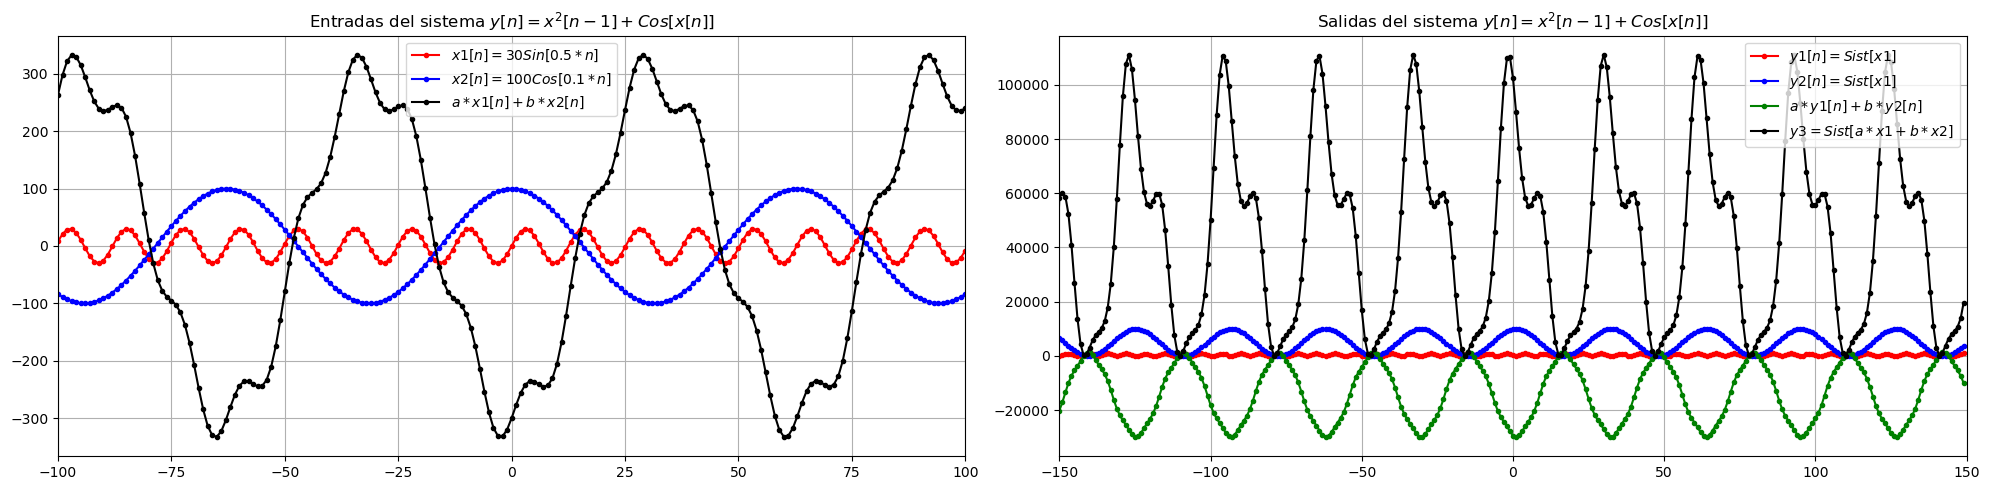

In [3]:
#definimos el vector de tiempo discreto
n=np.arange(-151,150,1)
#definimos las entradas
x1=30*np.sin(0.5*n)
x2=100*np.cos(0.1*n)
#definimos dos constantes de escalado
a=1.5
b=-3
#calculamos la suma ponderada de las entradas
x3=a*x1+b*x2
# definimos el sistema como una funcion de python 
def sist(n,x):
    y=x[n-np.min(n)-1]**2+np.cos(x[n-np.min(n)])
    return y
#calculamos las salidas individuales y la salida a x3
y1=sist(n,x1)
y2=sist(n,x2)
y3=sist(n,x3)
# calculamos la suma ponderada de las salidas
y3p=a*y1+b*y2
#ploteamos las entradas
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(n,x1,'.-r',label='$x1[n]=30Sin[0.5*n]$')
plt.plot(n,x2,'.-b',label='$x2[n]=100Cos[0.1*n]$')
plt.plot(n,x3,'.-k',label='$a*x1[n]+b*x2[n]$')
plt.title('Entradas del sistema $y[n]=x^2[n-1]+Cos[x[n]]$')
plt.grid(which='both')
plt.legend()
plt.tight_layout()
plt.xlim([-100,100])
#ploteamos las salidas
plt.subplot(1,2,2)
plt.plot(n,y1,'.-r',label='$y1[n]=Sist[x1]$')
plt.plot(n,y2,'.-b',label='$y2[n]=Sist[x1]$')
plt.plot(n,y3p,'.-g',label='$a*y1[n]+b*y2[n]$')
plt.plot(n,y3,'.-k',label='$y3=Sist[a*x1+b*x2]$')
plt.grid(which='both')
plt.title('Salidas del sistema $y[n]=x^2[n-1]+Cos[x[n]]$')
plt.xlim([-150,150])
plt.legend()
plt.tight_layout()

<u>Respuesta Ejercicio Python 4</u>:

Ver las secciones COMPLETAR en el código

In [4]:
DT = 0.001  # time step
RNG = np.array([-5, 9])  # time interval s

drng = RNG[1]-RNG[0]
n = np.arange(drng/DT)*DT+RNG[0]  # time
h = np.e**(-n)*np.heaviside(n, 1)*np.heaviside(5-n, 1)
x = n*np.heaviside(n, 1)*np.heaviside(3-n, 1)
y = np.convolve(x, h)

def plot(invertir=False,t=0):
    ######COMPLETAR apartado a)
    titulo = 'AGREGAR AQUI EL INTERVALO DE SOLAPAMIENTO PARA CADA t'
    if t<0:
        titulo = 'No hay solapamiento'
    if t>=0 and t<=3:
        titulo = 'Hay solapamiento de entrada [0,t]=[0,'+str(t)+']'
    if t>3 and t<=5:
        titulo = 'Hay solapamiento constante [0,3]'     
    if t>5 and t<=8:
        titulo = 'Hay solapamiento de salida [t-5,3]=['+'{:1.2f}'.format(t-5)+',3]' 
    if t>8:
        titulo = 'No hay solapamiento'  
    ######FIN COMPLETAR apartado a)

    fig = plt.figure(figsize=[16, 6])
    plt.subplot(1, 2, 1)
    if not invertir:
        t=0    
    ht = np.e**(-(t-n))*np.heaviside((t-n), 1)*np.heaviside(5-(t-n), 1)
    label1=r'h('+str(t) + r'-$\tau$)'
    if not invertir:
        ht=np.roll(ht,int(4/DT))
        ht=np.flip(ht)
        label1=r'h($\tau$)'
    else:
        plt.fill_between(n, 0, ((ht > 0) & (x > 0))*3, color='k', alpha=0.2)
        plt.text(t, 0.1, ' t=' + str(t))
        plt.title(titulo)
    plt.plot(n, ht, 'r', label=label1)
    plt.plot(n, x, 'b', label=r'x($\tau$)')
    plt.grid('true')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlabel(r'$\tau$')
    plt.legend()
    plt.xlim(RNG)
    plt.legend()
    plt.tight_layout()
    
    # plot convolucion resultante

    ######COMPLETAR apartado b)
    dt = 0.001
    tau = np.arange(1,3,dt)
    conv_t6 = np.sum(tau*np.e**(tau-6))*dt
    ######FIN COMPLETAR apartado b)

    plt.subplot(1, 2, 2)
    tv = np.arange(2*RNG[0], t, DT)
    plt.plot(tv, y[0:len(tv)]*DT, 'k', label=r'y($t$)')
    plt.scatter(6,conv_t6,marker='o', color='g')
    plt.text(6, conv_t6, ' Aprox. Num. = [6,' + '{:1.2f}'.format(conv_t6)+']')
    plt.grid('true')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlabel(r'$t$')
    plt.legend()
    plt.xlim(RNG)
    plt.ylim([0, 1.1*np.max(y*DT)])
    plt.legend()
    plt.tight_layout()

ipwidgets.interact(plot, invertir=[True,False], t=(-1, 9, 0.1))

interactive(children=(Dropdown(description='invertir', index=1, options=(True, False), value=False), FloatSlid…

<function __main__.plot(invertir=False, t=0)>

<u>Respuesta Ejercicio Python 5</u>:

El resultado de la convolución es :
['-15,0.0', '-14,0.0', '-13,0.0', '-12,0.0', '-11,0.0', '-10,0.0', '-9,0.0', '-8,0.0', '-7,0.0', '-6,0.0', '-5,0.0', '-4,0.0', '-3,0.0', '-2,0.0', '-1,0.0', '0,0.0', '1,1.0', '2,2.0', '3,3.0', '4,4.0', '5,4.0', '6,4.0', '7,3.0', '8,2.0', '9,1.0', '10,0.0', '11,0.0', '12,0.0', '13,0.0', '14,0.0']


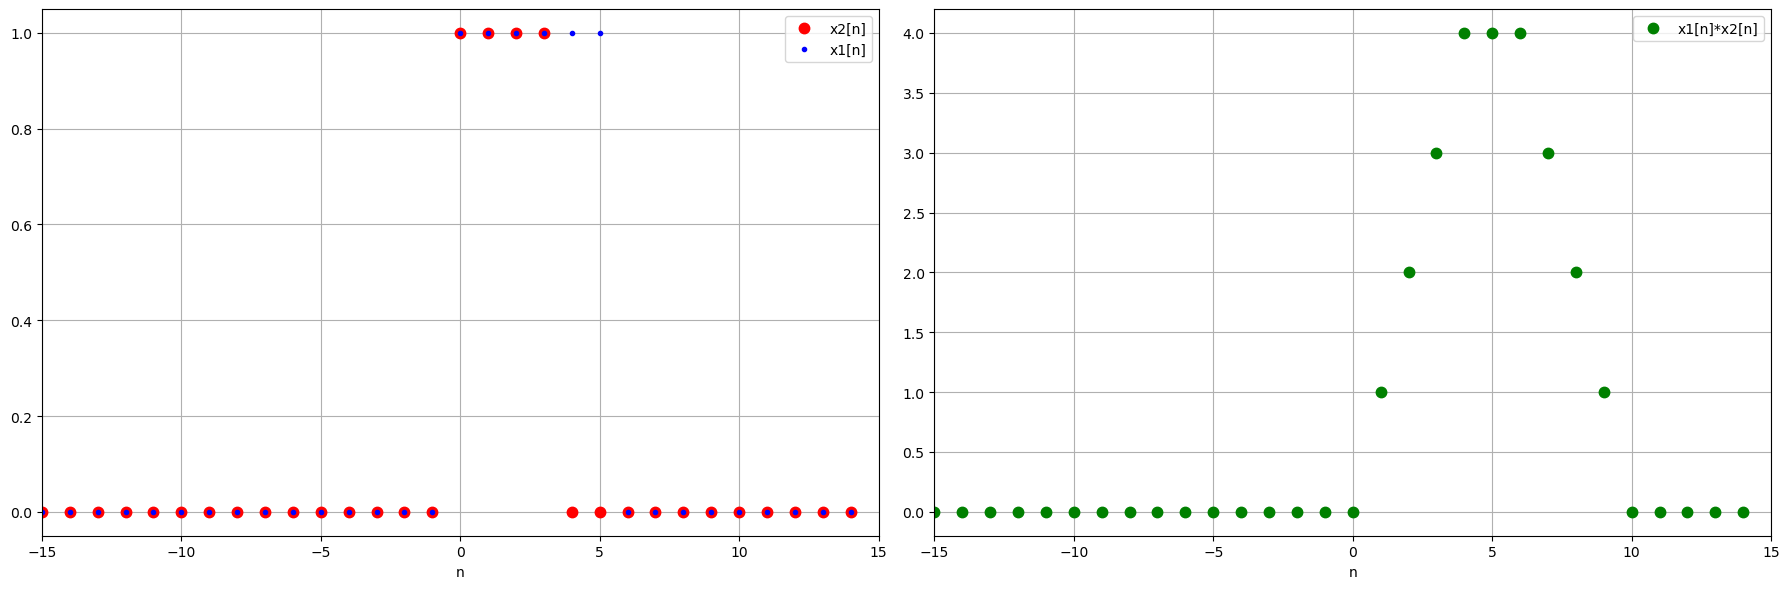

In [5]:
#define variable tiempo y las señales
lim = 15
n = np.arange(-lim, lim, 1)
x1 = np.heaviside(n, 1)-np.heaviside(n-6, 1)
x2 = np.heaviside(n, 1)-np.heaviside(n-4, 1)
conv = np.convolve(x1,x2, mode='same')

print('El resultado de la convolución es :')
print([str(n[i])+','+str(conv[i]) for i in range(len(n))])

#plot entradas
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
plt.plot(n, x2, '.r', markersize=15, label='x2[n]')
plt.plot(n, x1, '.b', label='x1[n]')
plt.xlim(-lim, lim)
plt.grid()
plt.tight_layout()
plt.xlabel('n')
plt.legend()

#plot convolucion
plt.subplot(1,2,2)
plt.plot(n,conv, '.g', markersize=15, label='x1[n]*x2[n]')
plt.xlim(-lim, lim)
plt.grid()
plt.tight_layout()
plt.xlabel('n')
plt.legend()
